In [1]:
from keras.models import Model
from keras.layers import Input, Dense, Reshape, Flatten

from keras.datasets import mnist

import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train/255, X_test/255

In [4]:
in_layer = Input(shape=(28, 28))
flat = Flatten()(in_layer)
d = Dense(units=400, activation="linear")(flat)
d = Dense(units=100, activation="linear")(d)
d = Dense(units=400, activation="linear")(d)
d = Dense(units=784, activation="sigmoid")(d)
out_layer = Reshape(target_shape=(28, 28))(d)

In [5]:
model = Model(inputs=in_layer, outputs=out_layer)

In [6]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_3 (Dense)              (None, 400)               40400     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               314384    
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28)            0   

In [7]:
model.compile(optimizer='adam', loss='mse')

In [8]:
model.fit(X_train, X_train, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 18s 299us/step - loss: 0.0109


In [9]:
out = model.predict(X_test[:5])

In [10]:
out.shape

(5, 28, 28)

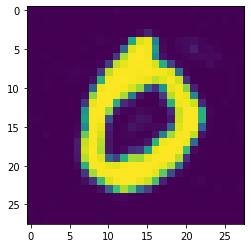

In [14]:
plt.imshow(out[3])